In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


In [3]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape       # number of rows, columns
df.info()      # data types, null values
df.describe()  # summary stats
df.isnull().sum()  # missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.fillna({
    'country': 'Unknown',
    'rating': 'Not Rated',
    'duration': 'Unknown'
}, inplace=True)


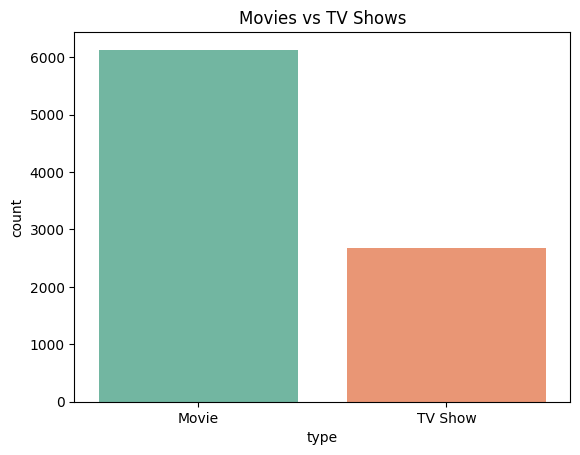

In [4]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Movies vs TV Shows')
plt.show()


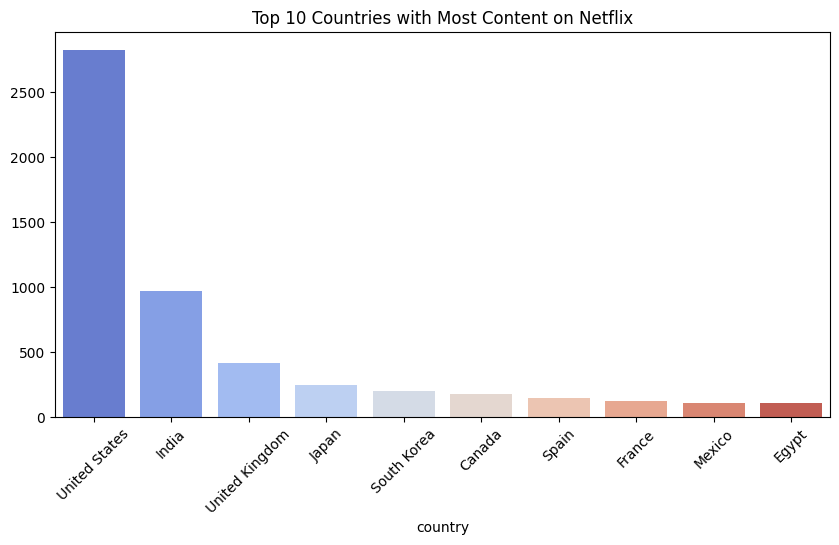

In [5]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xticks(rotation=45)
plt.show()


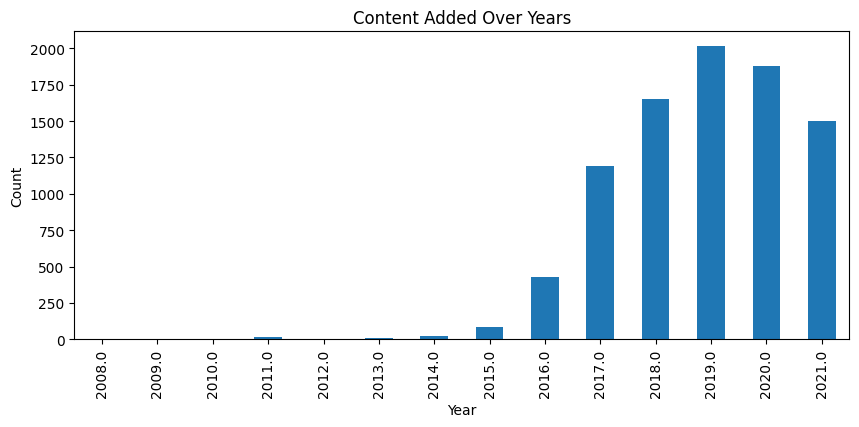

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


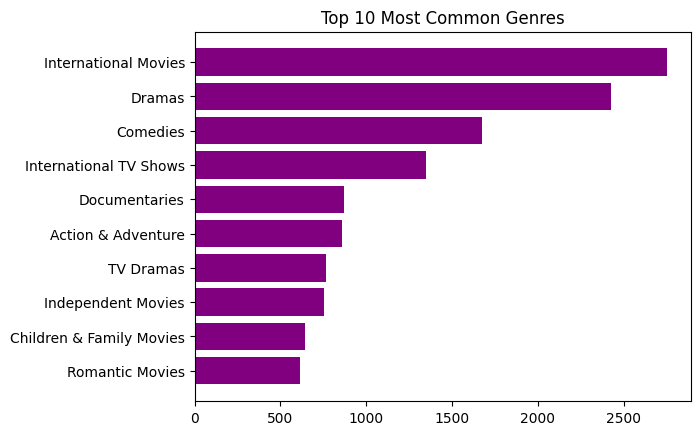

In [12]:
from collections import Counter
genres = df['listed_in'].dropna().str.split(', ')
all_genres = [genre for sublist in genres for genre in sublist]
genre_count = Counter(all_genres).most_common(10)

plt.barh([g[0] for g in genre_count][::-1], [g[1] for g in genre_count][::-1], color='purple')
plt.title('Top 10 Most Common Genres')
plt.show()


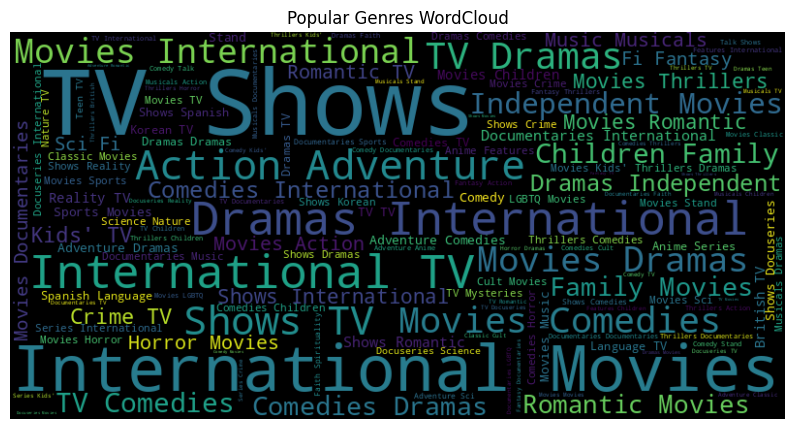

In [13]:
text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Genres WordCloud')
plt.show()


In [16]:
fig = px.bar(df['country'].value_counts().head(10),
             title='Top 10 Countries with Most Netflix Content')
fig.show()


In [ ]:
''''''Netflix Content Analysis: Key Takeaways 
Content Split: A vast majority of the library consists of Movies, which outnumber TV Shows by more than double.

Geographical Hub: The United States is the top country for content production, with India following as a strong second.

Growth Trend: Content addition on the platform saw a significant peak between the years 2018 and 2020.

Top Genres: The most common genres available are International Movies, Dramas, and Comedies, indicating a focus on global and widely popular content.''''''